http://www.samsunghospital.com/home/healthInfo/content/contenView.do?CONT_SRC=HOMEPAGE&CONT_SRC_ID=29394&CONT_CLS_CD=001021005001&CONT_ID=3860

1.표준체중 구하기

 
표준체중이란 키에 따라 다르며 건강상태를 유지하기 위한 최적의 체중을 의미하며 구하는 방법은 키(m : 미터)의 제곱을 남자는 22, 여자는 21을 곱한 수치입니다. 일반적으로 표준체중에 따른 하루 에너지 섭취량을 산정합니다.

In [ ]:
def standard_weight(gender,height):
    if gender=='남':
        std_weight=((height/100) **2) * 22 

    if gender=='여':
        std_weight=((height/100) **2) * 21
    
    return std_weight


In [ ]:
standard_weight('남',170)

63.57999999999999

2.활동량 선택
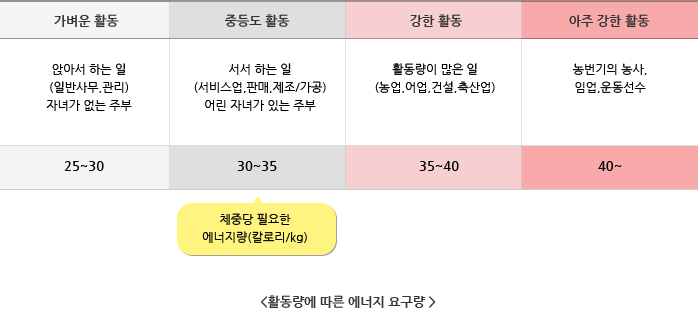


하루 필요 에너지는 활동량에 따라 다를 수 있는데 가벼운 활동, 중등도 활동, 강한 활동, 아주 강한 활동으로 나누어 산정합니다. 보통 가벼운 활동을 하는 사람은 표준체중(kg)에 25에서 30칼로리(kcal)를 곱하여 하루 필요량을 산정하고, 아주 강한 활동을 하는 사람은 40칼로리(kcal) 이상을 곱하여 계산합니다. 따라서 같은 체중이더라도 활동량에 따라 하루 300~500kcal 이상 필요 열량이 달라질 수 있습니다.

■체중감량을 위한 하루 열량 섭취량

 
이론에 따르면 1kg의 체중감량을 위한다면 7,000칼로리를 줄여야 합니다. 급작스런 체중감소는 몸에 무리를 줄 수 있기 때문에 보통 일주일에 0.5kg 정도의 감량을 권장합니다. 0.5kg은 3500칼로리를 줄여야 하므로 하루에 500칼로리 정도의 열량을 조절하여 하루 섭취량을 계산해야 합니다. 그런데 이 때 섭취량으로만 500칼로리를 줄이게 되면 영양이 부족할 수 있고 공복감이 심해질 수 있습니다. 따라서 체중감량 시 운동으로 소모하는 열량을 늘리고 섭취량을 줄이는 것을 병행하는 것을 권장합니다.

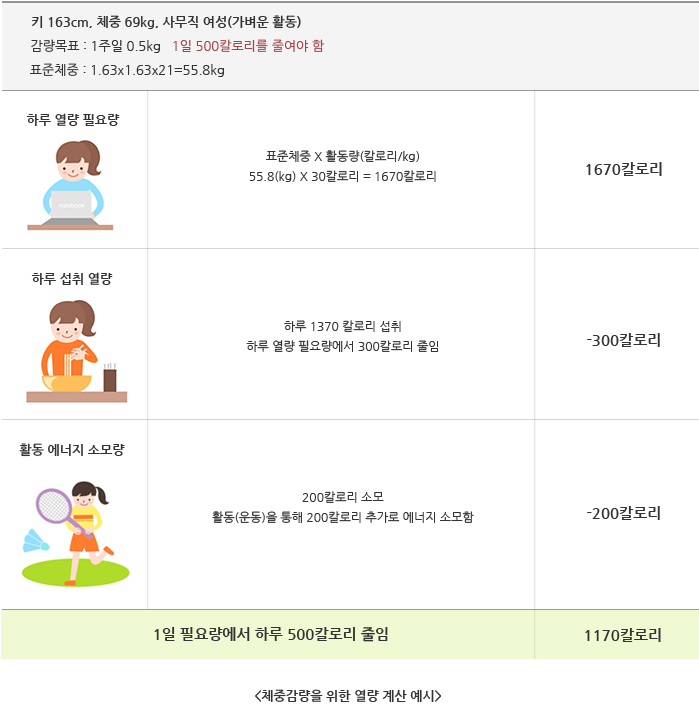

In [324]:
df = pd.read_csv("/content/영양소별 기준2.csv", encoding='cp949')
df = df[4:].reset_index(drop=True)
df = df[['성별', '연령', '에너지필요추정량(kcal/일)', '탄수화물권장섭취량', '단백질(g/일)평균필요량',
       '단백질(g/일)권장섭취량', '칼슘_권장_섭취량', '나트륨_권장_섭취량', '마그네슘_평균_필요량', '마그네슘_권장_섭취량', '콜레스테롤', '당류(에너지섭취량비율_']]
lst = df['연령'].values.tolist()
hi =[]
for ts in lst:
  hi.append(ts.replace("(세)","").replace(" 이상","").split("-"))

In [ ]:
def active_energy(active):
    if active == '가벼운':
      weight_eg = random.randint(25, 30)
    if active == '중등도':
      weight_eg = random.randint(30, 35)
    if active == '강한':
      weight_eg = random.randint(35, 40)
    if active == '아주 강한':
      weight_eg = random.randint(40, 45)
    return weight_eg

In [325]:
def nutrition (gender, age):
  for ts in hi:
    try:
      if age >= int(ts[0]) and age <= int(ts[1]):
        if gender == "남":
          return df[df.성별 == '남'].iloc[hi.index([ts[0],ts[1]]),2:]
        if gender == "여":
          return df[df.성별 == '여'].iloc[hi.index([ts[0],ts[1]]),2:]
    except:
      try:
        if age >= 75:
          if gender == "남":
            return df[df.성별 == '남'].iloc[hi.index(['75']),2:]
          if gender == "여":
            return df[df.성별 == '여'].iloc[hi.index(['75']),2:]
      except:
        if age == "임신부":
          return df.iloc[hi.index(['임신부']),2:]
        if age == "수유부":
          return df.iloc[hi.index(['수유부']),2:]
nutrition('여', 76)

에너지필요추정량(kcal/일)    1,500
탄수화물권장섭취량           130.0
단백질(g/일)평균필요량          40
단백질(g/일)권장섭취량          50
칼슘_권장_섭취량             800
나트륨_권장_섭취량          1,100
마그네슘_평균_필요량         240.0
마그네슘_권장_섭취량           280
콜레스테롤               300.0
당류(에너지섭취량비율_          15%
Name: 17, dtype: object

In [328]:
def energy(age, tk):
  car = tk * 50 * 0.01
  pro = tk * 20 * 0.01
  sug = tk * 15 * 0.01
  if age > 2:
    fat = tk * 30 * 0.01
  else :
    fat = tk * 30 * 0.01
  return f"탄수화물: {int(car/4)}g, 단백질: {int(pro/4)}g, 지방: {int(fat/9)}g, 당: {int(sug/4)}g"

In [329]:
import random
def daily_energy(gender, age, height, active):
    std_weight = standard_weight(gender, height)
    weight_eg = active_energy(active)
    daily = std_weight * weight_eg
    reduce = random.randrange(200, 500, 100)
    take = int(daily - reduce)
    en = energy(age, take)
    nut = nutrition(gender, age)
    return f"일일 섭취 열량: {take}kcal, 활동 에너지 소모량: {500 - reduce}kcal, {en}, {nut}" 
daily_energy('남', 18, 170, '중등도')

'일일 섭취 열량: 1961kcal, 활동 에너지 소모량: 300kcal, 탄수화물: 245g, 단백질: 98g, 지방: 65g, 당: 73g, 에너지필요추정량(kcal/일)    2,700\n탄수화물권장섭취량           130.0\n단백질(g/일)평균필요량          55\n단백질(g/일)권장섭취량          65\n칼슘_권장_섭취량             900\n나트륨_권장_섭취량          1,500\n마그네슘_평균_필요량         340.0\n마그네슘_권장_섭취량           410\n콜레스테롤                 NaN\n당류(에너지섭취량비율_          15%\nName: 3, dtype: object'

In [330]:
daily_energy('남', 18, 170, '중등도').replace("\n", ", ").split(', ')

['일일 섭취 열량: 1570kcal',
 '활동 에너지 소모량: 100kcal',
 '탄수화물: 196g',
 '단백질: 78g',
 '지방: 52g',
 '당: 58g',
 '에너지필요추정량(kcal/일)    2,700',
 '탄수화물권장섭취량           130.0',
 '단백질(g/일)평균필요량          55',
 '단백질(g/일)권장섭취량          65',
 '칼슘_권장_섭취량             900',
 '나트륨_권장_섭취량          1,500',
 '마그네슘_평균_필요량         340.0',
 '마그네슘_권장_섭취량           410',
 '콜레스테롤                 NaN',
 '당류(에너지섭취량비율_          15%',
 'Name: 3',
 'dtype: object']